In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

import re

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import pickle
import json

In [11]:
import seaborn 
seaborn .__version__

'0.11.0'

In [320]:
#Loading data
import pandas as pd
df      =  pd.read_csv(r'C:\Users\MYPC\Desktop\Data_sets\main_proj_car\Project-master\Project-master\train_data.csv')
df_test =  pd.read_csv(r'C:\Users\MYPC\Desktop\Data_sets\main_proj_car\Project-master\Project-master\test_data.csv')

In [321]:
#check for the null values
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [322]:
df.shape

(6019, 14)

## Data Cleaning 

In [323]:
#Removing irrelevant features
df.drop(['Unnamed: 0','New_Price'],axis=1,inplace=True)

#df_test.drop(['Unnamed: 0','New_Price'],axis=1,inplace=True)

In [324]:
#for ease of use , converting all strings to lower case 
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

#df_test = df_test.applymap(lambda s:s.lower() if type(s) == str else s)

In [325]:
#adding 2 new features
df['Car_Company']    = df['Name'].apply(lambda x:x.split(' ')[0])
df['Car_Model']      = df['Name'].apply(lambda x:x.split(' ')[1])



#df_test['Car_Company']    = df_test['Name'].apply(lambda x:x.split(' ')[0])
#df_test['Car_Model']      = df_test['Name'].apply(lambda x:x.split(' ')[1])

In [326]:
#function to remove suffix and converting to numerics
nums = ['Mileage','Engine','Power']

def to_num(df):
    df_updated = df.replace(to_replace =r'[a-zA-z/]', value = ' ', regex = True)
    
    return df_updated

In [327]:
#converting str to nums
df_num = to_num(df[nums])

#df_test_num = to_num(df_test[nums])

In [328]:
#replacing feture names for the convenience
df_num.rename(columns={'Mileage': 'Mileage_kmpl','Engine':'Engine_CC','Power':'Power_bhp'},inplace = True)

#df_test_num.rename(columns={'Mileage': 'Mileage_kmpl','Engine':'Engine_CC','Power':'Power_bhp'},inplace = True)

In [329]:
#applying to-num function 

df_num['Mileage_kmpl'] = df_num['Mileage_kmpl'].apply(pd.to_numeric, errors='coerce')
df_num['Engine_CC']    = df_num['Engine_CC'].apply(pd.to_numeric, errors='coerce')
df_num['Power_bhp']    = df_num['Power_bhp'].apply(pd.to_numeric, errors='coerce')



#df_test_num['Mileage_kmpl'] = df_test_num['Mileage_kmpl'].apply(pd.to_numeric, errors='coerce')
#df_test_num['Engine_CC']    = df_test_num['Engine_CC'].apply(pd.to_numeric, errors='coerce')
#df_test_num['Power_bhp']    = df_test_num['Power_bhp'].apply(pd.to_numeric, errors='coerce')

In [330]:
df_01 = pd.concat([df,df_num],axis=1)
df_01.drop(['Mileage','Engine','Power'],axis=1,inplace=True)

#df_test_01 = pd.concat([df_test,df_test_num],axis=1)
#df_test_01.drop(['Mileage','Engine','Power'],axis=1,inplace=True)

In [331]:
#removing suffix and converting to num
df_01['CC_Tag'] = df_01['Name'].str.extract('([0-9]+\.[0-9]*)',expand=True)
df_01['CC_Tag'] = df_01['CC_Tag'].apply(pd.to_numeric, errors='coerce')

#df_test_01['CC_Tag'] = df_test_01['Name'].str.extract('([0-9]+\.[0-9]*)',expand=True)
#df_test_01['CC_Tag'] = df_test_01['CC_Tag'].apply(pd.to_numeric, errors='coerce')

In [332]:
df_01[df_01['Car_Model'] == 'slk-class']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Car_Company,Car_Model,Mileage_kmpl,Engine_CC,Power_bhp,CC_Tag
693,mercedes-benz slk-class slk 350,coimbatore,2016,22732,petrol,automatic,first,2.0,55.54,mercedes-benz,slk-class,18.1,3498.0,306.0,NaN
798,mercedes-benz slk-class slk 350,bangalore,2015,10000,petrol,automatic,first,2.0,55.00,mercedes-benz,slk-class,18.1,3498.0,306.0,NaN
4691,mercedes-benz slk-class 55 amg,bangalore,2014,3000,petrol,automatic,second,2.0,90.00,mercedes-benz,slk-class,12.0,5461.0,421.0,NaN


In [333]:
df['Car_Model'].unique()

array(['wagon', 'creta', 'jazz', 'ertiga', 'a4', 'eon', 'micra', 'innova',
       'vento', 'indica', 'ciaz', 'city', 'swift', 'rover', 'pajero',
       'amaze', 'duster', 'new', '3', 's', 'a6', 'i20', 'alto', 'wrv',
       'corolla', 'ssangyong', 'vitara', 'kuv', 'm-class', 'polo', 'nano',
       'elantra', 'xcent', 'thar', 'grand', 'kwid', 'i10', 'x-trail',
       'zen', 'figo', 'c-class', 'cayenne', 'xuv500', 'terrano', 'brio',
       'fiesta', 'santro', 'zest', 'ritz', '5', 'fortuner', 'ecosport',
       'verna', 'go', 'omni', 'etios', 'xf', 'eeco', 'civic', 'v40', 'b',
       'scorpio', 'cr-v', 'slc', '1', 'beat', 'rapid', 'rs5', 'superb',
       'x5', 'glc', 'countryman', 'optra', 'lodgy', 'e-class', 'baleno',
       'laura', 'nuvosport', 'fabia', 'indigo', 'q3', 'octavia', 'a8',
       'verito', 'cooper', 'santa', 'x1', 'accent', 'tucson', 'gle',
       'a-star', 'grande', 'x3', 'q7', 'jetta', 'gla', 'celerio', 'sumo',
       'accord', '6', 'manza', 'spark', 'clubman', 'teana', '

In [334]:
#observed Car_Model column and replace it with relevent model names


df_01['Car_Model'] = np.where((df['Car_Model'] == 'new') & (df['Car_Company'] == 'mercedes-benz') ,'c-class', df['Car_Model'])
df_01['Car_Model'] = np.where((df['Car_Model'] == 'new') & (df['Car_Company'] == 'tata') ,'safari-dicor', df['Car_Model'])

df_01['Car_Model'] = np.where((df['Car_Model'] == 's') & (df['Car_Company'] == 'mercedes-benz') ,'s-class', df['Car_Model'])
df_01['Car_Model'] = np.where((df['Car_Model'] == 's') & (df['Car_Company'] == 'maruti') ,'s-cross', df['Car_Model'])

df_01['Car_Model'] = np.where((df['Car_Model'] == 'b') & (df['Car_Company'] == 'mercedes-benz') ,'s-cross', df['Car_Model'])


df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'wagon-R' if s == 'wagon' else s)
df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'range-rover' if s == 'rover' else s)
df_01.Car_Model = df_01.Car_Model.apply(lambda s :  '3-Series' if s == '3' else s)
df_01.Car_Model = df_01.Car_Model.apply(lambda s :  '5-Series' if s == '5' else s)
df_01.Car_Model = df_01.Car_Model.apply(lambda s :  '1-Series' if s == '1' else s)
df_01.Car_Model = df_01.Car_Model.apply(lambda s :  '6-Series' if s == '6' else s)

df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'a-class' if s == 'a' else s)

df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'redi-go' if s == 'redi' else s)

df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'force-one' if s == 'one' else s)

df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'f-type' if s == 'f' else s)

df_01.Car_Model = df_01.Car_Model.apply(lambda s :  'tuv-300' if s == 'tuv' else s)


In [335]:

df_01.Car_Company = df_01.Car_Company.apply(lambda s : 'land-rover' if s == 'land' else s)
df_01.Car_Company = df_01.Car_Company.apply(lambda s : 'mini-cooper' if s == 'mini' else s)


#df_test_01.Car_Model = df_test_01.Car_Model.apply(lambda s :  'wagonR' if s == 'wagon' else s)

In [336]:
df_02 = df_01[df_01.Fuel_Type != 'electric']

#df_test_02  = df_test_01[df_test_01.Fuel_Type != 'electric']

In [337]:
#df_02['Age'] = 2020 - df_01.Year

#df_test_02['Age'] =  2020 - df_test_01.Year

In [338]:
df_03 = df_02.drop(['Name'],axis=1)

#df_test_03 = df_test_02.drop(['Name','Year'],axis=1)

In [339]:
df_03.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Car_Company,Car_Model,Mileage_kmpl,Engine_CC,Power_bhp,CC_Tag
0,mumbai,2010,72000,cng,manual,first,5.0,1.75,maruti,wagon-R,26.60,998.0,58.16,NaN
1,pune,2015,41000,diesel,manual,first,5.0,12.50,hyundai,creta,19.67,1582.0,126.20,1.6
2,chennai,2011,46000,petrol,manual,first,5.0,4.50,honda,jazz,18.20,1199.0,88.70,NaN
3,chennai,2012,87000,diesel,manual,first,7.0,6.00,maruti,ertiga,20.77,1248.0,88.76,NaN
4,coimbatore,2013,40670,diesel,automatic,second,5.0,17.74,audi,a4,15.20,1968.0,140.80,2.0


In [340]:
df_04 = df_03[['Car_Company','Car_Model','Engine_CC','Power_bhp','Mileage_kmpl','Kilometers_Driven','Fuel_Type','Transmission','Seats','Owner_Type','Year','Location','CC_Tag','Price']]

In [348]:
df_04['Car_Model'].unique()

array(['wagon-R', 'creta', 'jazz', 'ertiga', 'a4', 'eon', 'micra',
       'innova', 'vento', 'indica', 'ciaz', 'city', 'swift',
       'range-rover', 'pajero', 'amaze', 'duster', 'new', '3-Series', 's',
       'a6', 'i20', 'alto', 'wrv', 'corolla', 'ssangyong', 'vitara',
       'kuv', 'm-class', 'polo', 'nano', 'elantra', 'xcent', 'thar',
       'grand', 'kwid', 'i10', 'x-trail', 'zen', 'figo', 'c-class',
       'cayenne', 'xuv500', 'terrano', 'brio', 'fiesta', 'santro', 'zest',
       'ritz', '5-Series', 'fortuner', 'ecosport', 'verna', 'go', 'omni',
       'etios', 'xf', 'eeco', 'civic', 'v40', 's-cross', 'scorpio',
       'cr-v', 'slc', '1-Series', 'beat', 'rapid', 'rs5', 'superb', 'x5',
       'glc', 'countryman', 'optra', 'lodgy', 'e-class', 'baleno',
       'laura', 'nuvosport', 'fabia', 'indigo', 'q3', 'octavia', 'a8',
       'verito', 'cooper', 'santa', 'x1', 'accent', 'tucson', 'gle',
       'a-star', 'grande', 'x3', 'q7', 'jetta', 'gla', 'celerio', 'sumo',
       'accord', '6

### Filling The Missing Values

### 1.Engine_CC

In [349]:
df_04.isnull().sum()

Car_Company             0
Car_Model               0
Engine_CC              36
Power_bhp             143
Mileage_kmpl            0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Seats                  42
Owner_Type              0
Year                    0
Location                0
CC_Tag               3807
Price                   0
dtype: int64

In [350]:
def impute_CC(cols):
    Engine_CC=cols[0]
    CC_Tag   =cols[1]
    
    if pd.isnull(Engine_CC):
        
        if CC_Tag == 1.2:
            return 1200
        elif CC_Tag == 1.5:
            return 1500
        elif CC_Tag == 1.6:
            return 1600
        elif CC_Tag == 3.0:
            return 3000
        elif CC_Tag == 1.3:
            return 1300
        elif CC_Tag == 1.4:
            return 1400
        
    else:
        return Engine_CC

In [351]:
df_04.Engine_CC = df_04[['Engine_CC','CC_Tag']].apply(impute_CC,axis=1)
df_04.Engine_CC.isnull().sum()

17

In [380]:
def impute_CC_by_name(cols):
    
    Engine_CC = cols[0]
    Car_Model = cols[1]
    
    if pd.isnull(Engine_CC):
        
        if Car_Model == 'santro':
            return 1086
        
        if Car_Model == '5':#bmw 5series
            return 1995
        
        if Car_Model == 'range-rover':
            return 3000
        
        if Car_Model == 'jazz' :
            return 1200
        
        if Car_Model =='wagon-R' :
            return 998
        
        if Car_Model == 'etios':
            return 1350
        
        if Car_Model == 'cr-v':
            return 2200
        
        if Car_Model == '5-Series':
            return 2993
    else:
        return Engine_CC

In [381]:
df_04.Engine_CC = df_04[['Engine_CC','Car_Model']].apply(impute_CC_by_name,axis=1)
df_04.Engine_CC.isnull().sum()

0

### 2.Power_bhp

In [383]:
df_04['Power_bhp'].fillna(df_04.groupby('Engine_CC')['Power_bhp'].transform('median'),inplace=True)
df_04['Power_bhp'].isnull().sum()

30

In [384]:
df_04['Power_bhp'].fillna(df_04.groupby('Car_Model')['Power_bhp'].transform('median'),inplace=True)
df_04['Power_bhp'].isnull().sum()

5

In [385]:
def impute_bhp_by_custom(cols):
    
    Power_bhp = cols[0]
    Engine_CC = cols[1]
    
    if pd.isnull(Power_bhp):
        
        if Engine_CC == 3436.0:
            return 221
        
        elif Engine_CC == 1242:
            return 57
        
        elif Engine_CC == 970:
            return 46
    else :
        return Power_bhp

In [386]:
df_04.Power_bhp = df_04[['Power_bhp','Engine_CC']].apply(impute_bhp_by_custom,axis=1)
df_04['Power_bhp'].isnull().sum()

0

### 3.Seat

In [387]:
df_04['Seats'].fillna(df_04.groupby('Car_Model')['Seats'].transform('median'),inplace=True)
df_04['Seats'].isnull().sum()

3

In [388]:
def impute_seat_estilo(cols):
    
    Seats = cols[0]
    Car_Model = cols[1]
    
    if pd.isnull(Seats):
        
        if Car_Model == 'estilo' :
            return 5
        
    else:
        return Seats
            

In [389]:
df_04['Seats'] = df_04[['Seats','Car_Model']].apply(impute_seat_estilo,axis=1)
df_04['Seats'].isnull().sum()

0

###  4.Mileage

In [390]:
df_04['Mileage_kmpl'] = df_04['Mileage_kmpl'].replace(0.0,np.nan)
df_04['Mileage_kmpl'].fillna(df_04.groupby('Engine_CC')['Mileage_kmpl'].transform('median'),inplace=True)
df_04['Mileage_kmpl'].isnull().sum()

9

In [391]:
df_04['Mileage_kmpl'].fillna(df_04.groupby('Car_Model')['Mileage_kmpl'].transform('median'),inplace=True)
df_04['Mileage_kmpl'].isnull().sum()

0

In [393]:
df_05 = df_04.drop(['CC_Tag'],axis=1)

In [394]:
df_05.isnull().sum()

Car_Company          0
Car_Model            0
Engine_CC            0
Power_bhp            0
Mileage_kmpl         0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Seats                0
Owner_Type           0
Year                 0
Location             0
Price                0
dtype: int64

### Numeric Column

In [398]:
cars_numeric = df_05.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,Engine_CC,Power_bhp,Mileage_kmpl,Kilometers_Driven,Seats,Year,Price
0,998.0,58.16,26.60,72000,5.0,2010,1.75
1,1582.0,126.20,19.67,41000,5.0,2015,12.50
2,1199.0,88.70,18.20,46000,5.0,2011,4.50
3,1248.0,88.76,20.77,87000,7.0,2012,6.00
4,1968.0,140.80,15.20,40670,5.0,2013,17.74


In [399]:
#Data Visulaization

<Figure size 2160x2160 with 0 Axes>

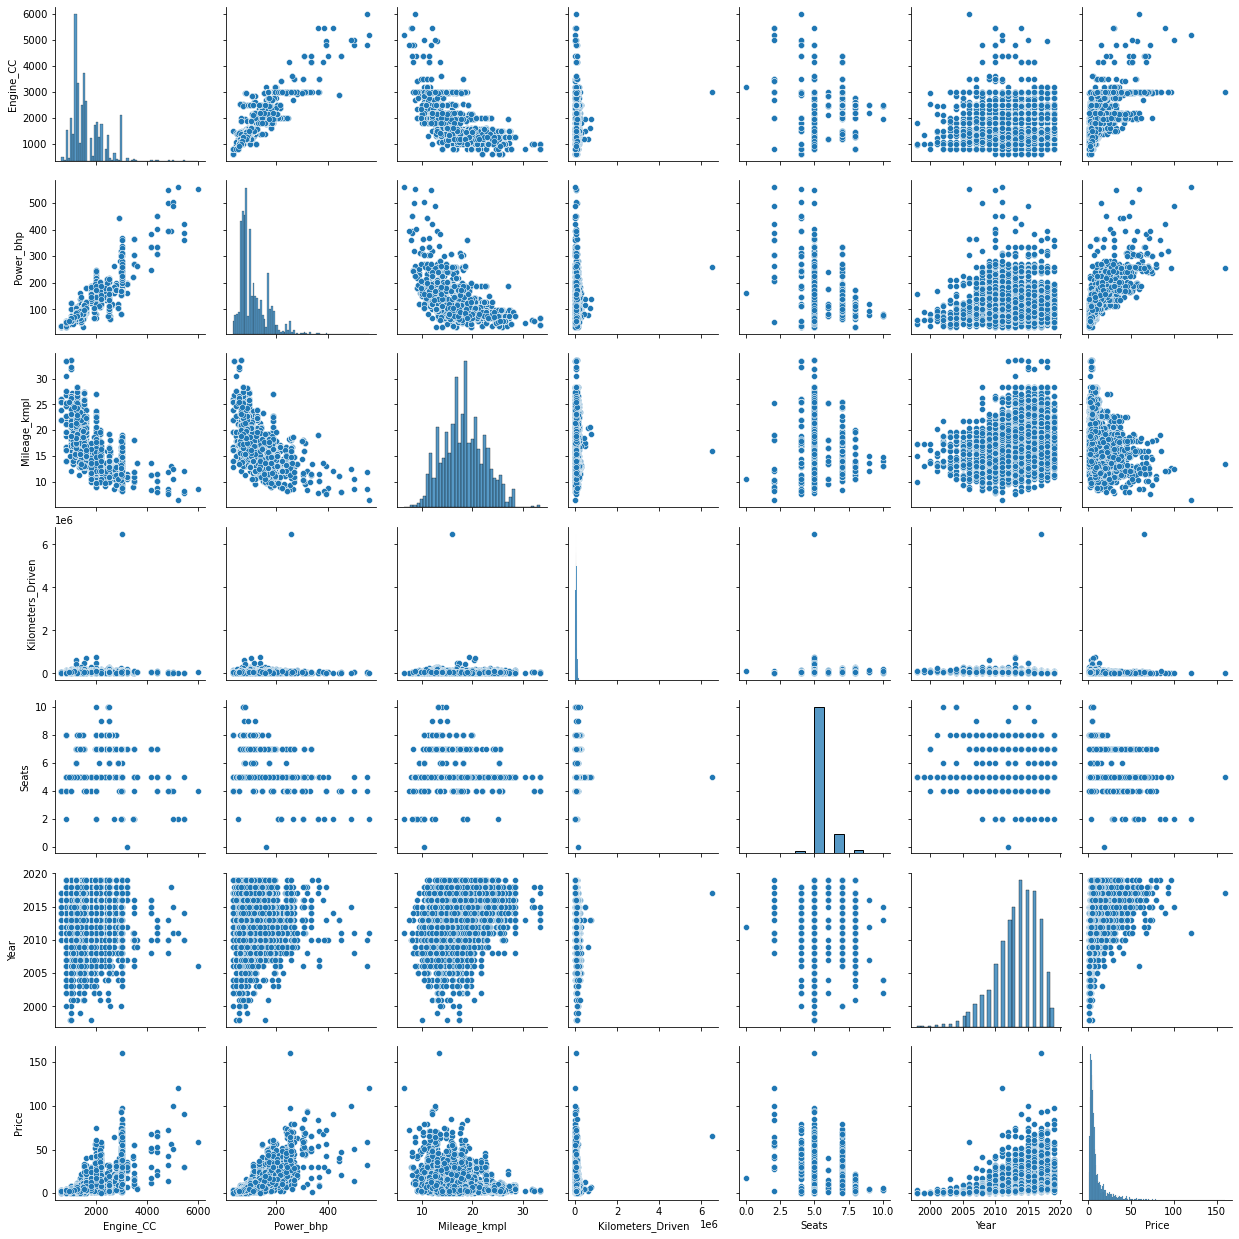

In [400]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

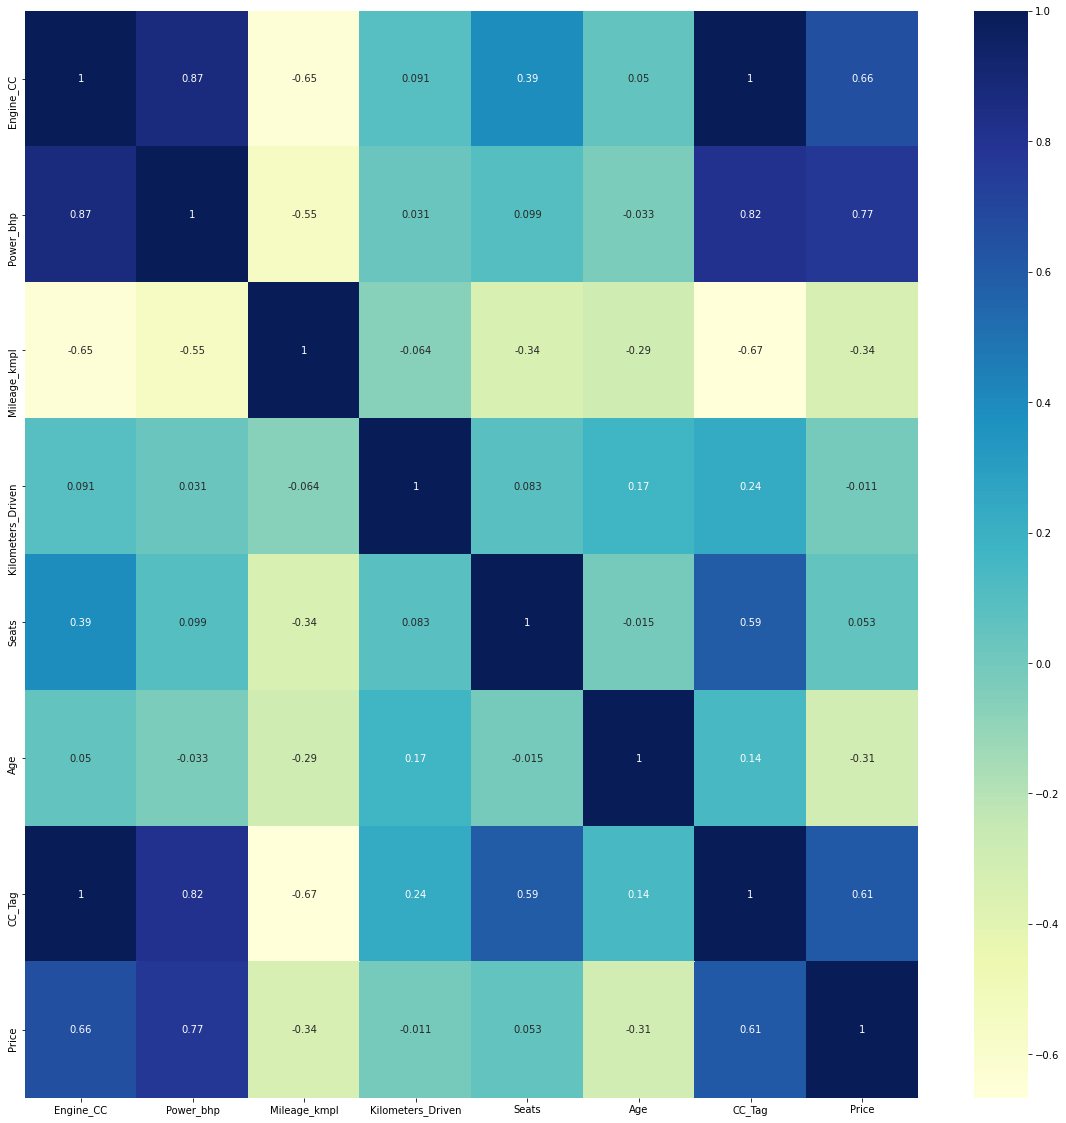

In [1037]:
plt.figure(figsize = (20,20))
sns.heatmap(df_04.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [418]:
### cat column

In [419]:
categorical_cols = df_05.select_dtypes(include = ['object'])
categorical_cols.head()

,Car_Company,Car_Model,Fuel_Type,Transmission,Owner_Type,Location
0,maruti,wagon-R,cng,manual,first,mumbai
1,hyundai,creta,diesel,manual,first,pune
2,honda,jazz,petrol,manual,first,chennai
3,maruti,ertiga,diesel,manual,first,chennai
4,audi,a4,diesel,automatic,second,coimbatore


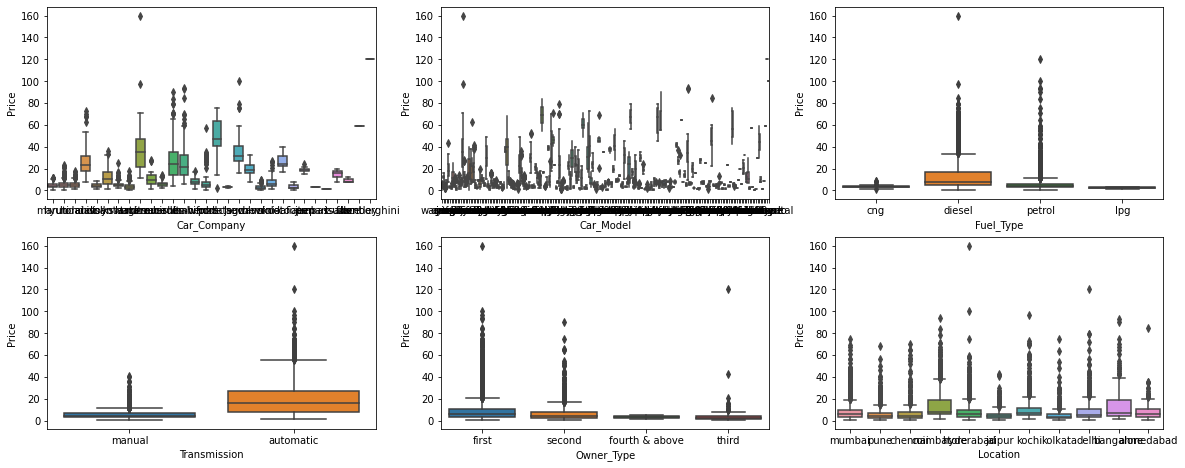

In [420]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Car_Company', y = 'Price', data = df_04)
plt.subplot(3,3,2)
sns.boxplot(x = 'Car_Model', y = 'Price', data = df_04)
plt.subplot(3,3,3)
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df_04)
plt.subplot(3,3,4)
sns.boxplot(x = 'Transmission', y = 'Price', data = df_04)
plt.subplot(3,3,5)
sns.boxplot(x = 'Owner_Type', y = 'Price', data = df_04)
plt.subplot(3,3,6)
sns.boxplot(x = 'Location', y = 'Price', data = df_04)

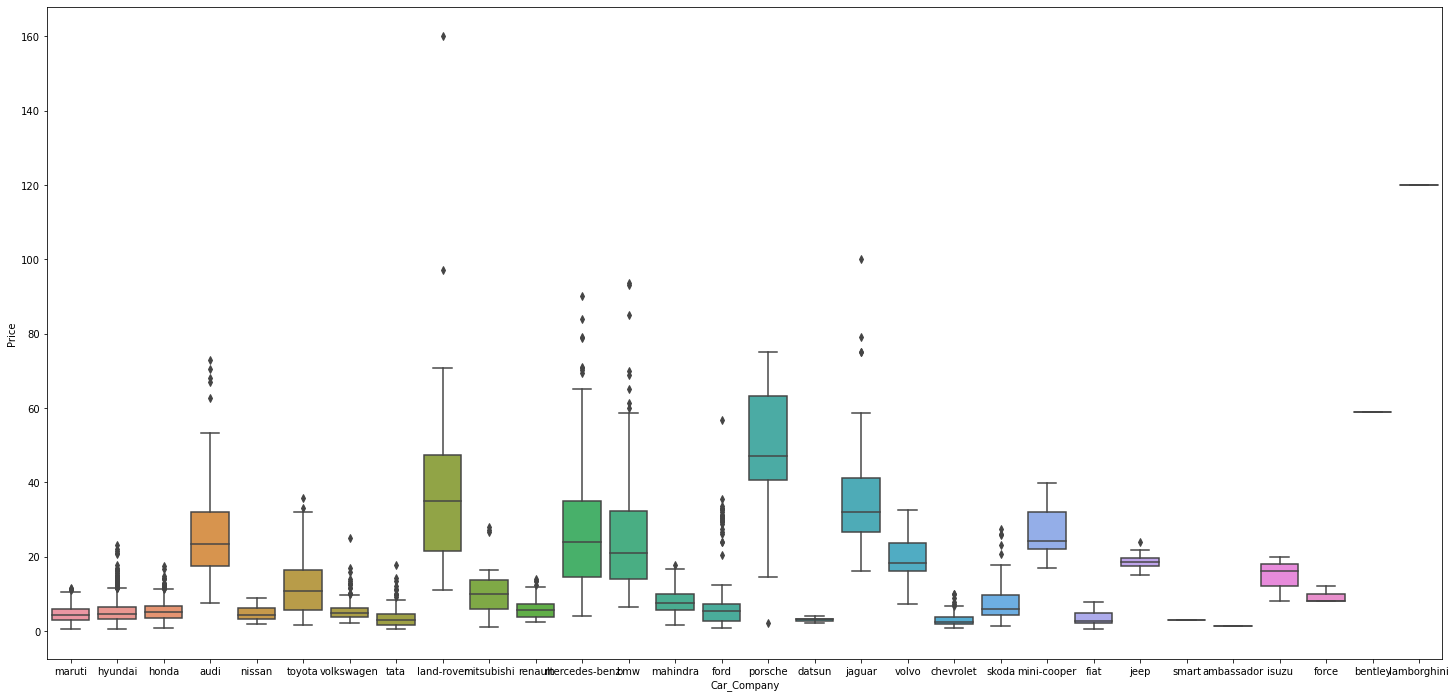

In [421]:
plt.figure(figsize = (25,12))
sns.boxplot(x = 'Car_Company', y = 'Price', data =df_04)

observations:
car brads have singnificance (price)

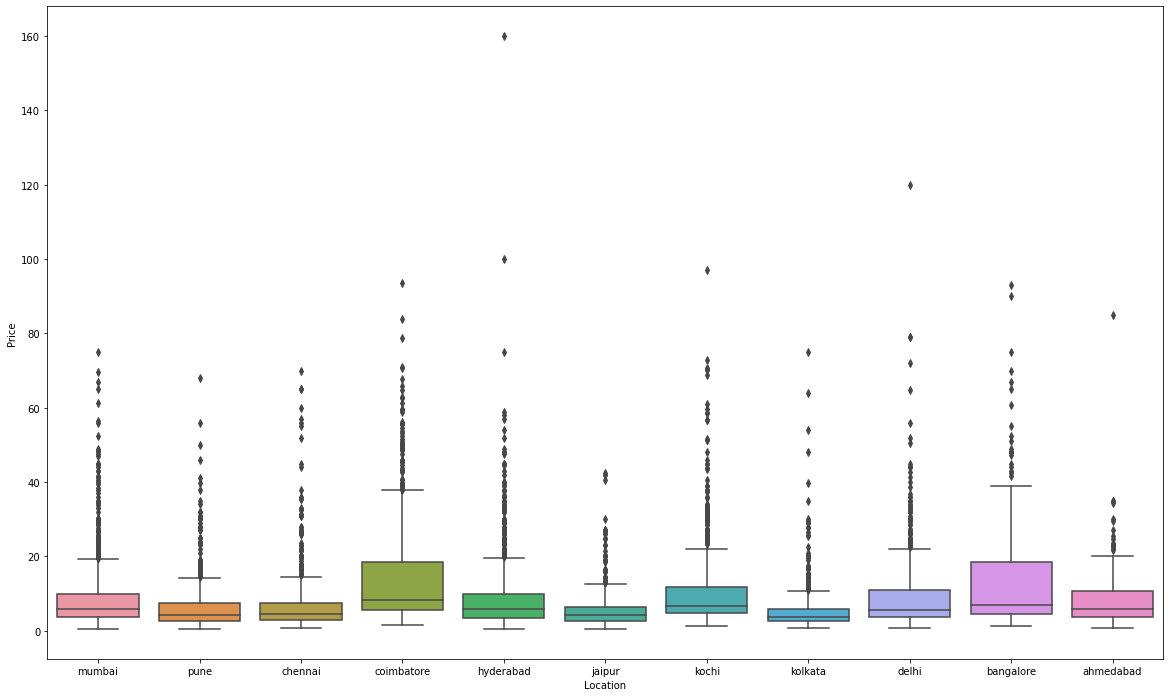

In [404]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'Location', y = 'Price', data =df_04)

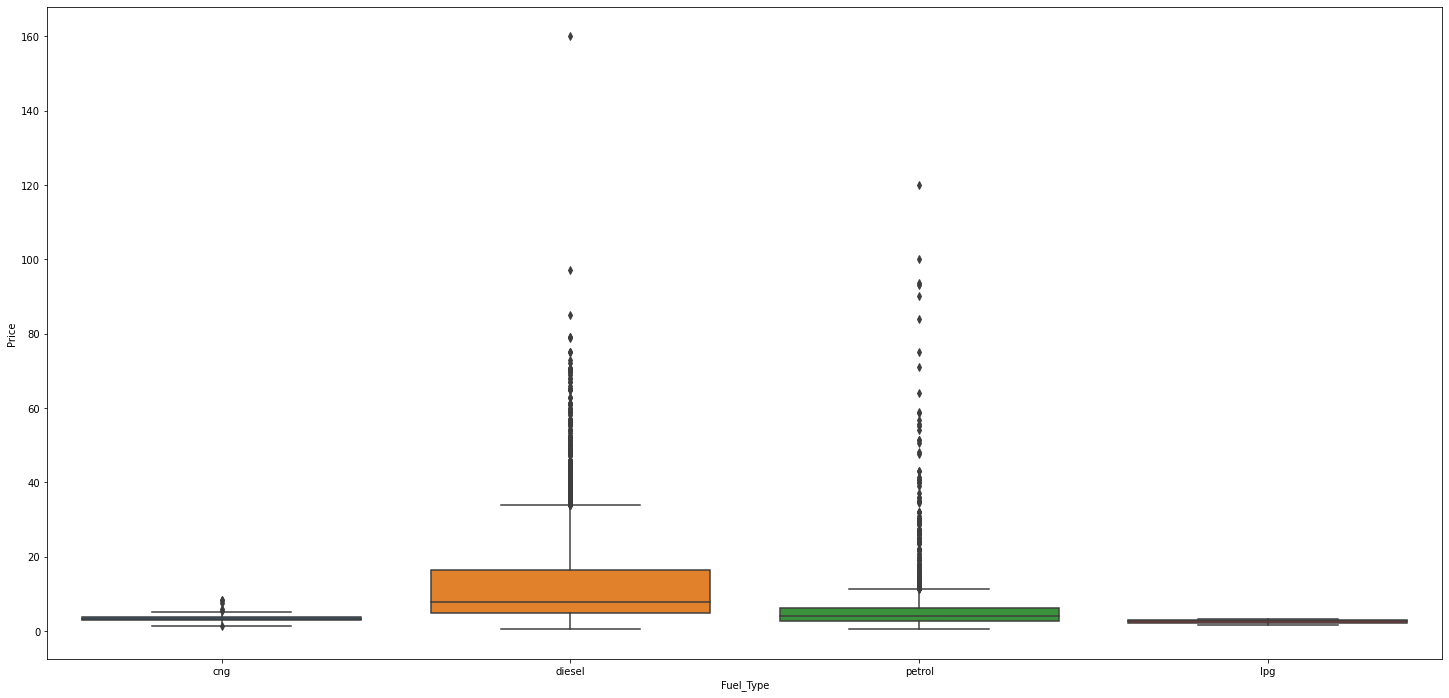

In [405]:
plt.figure(figsize = (25,12))
sns.boxplot(x = 'Fuel_Type', y = 'Price', data =df_04)

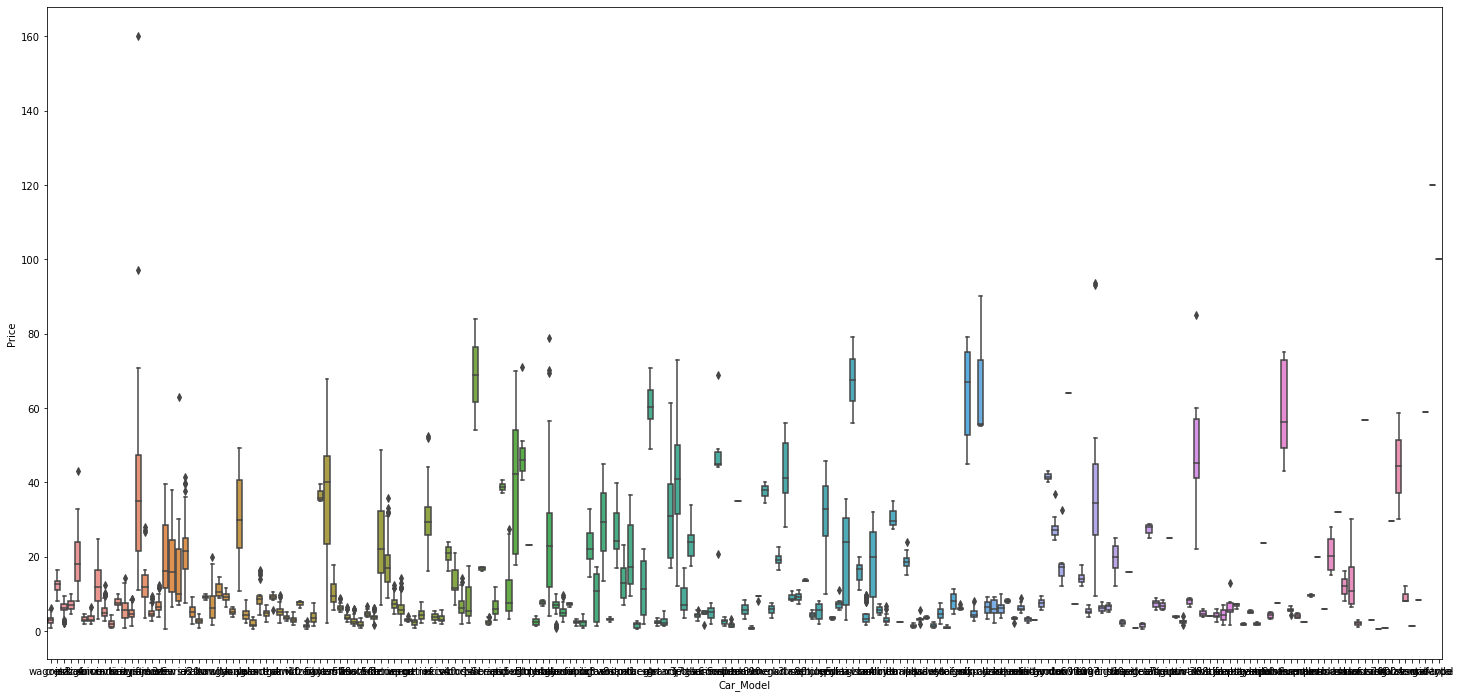

In [406]:
plt.figure(figsize = (25,12))
sns.boxplot(x = 'Car_Model', y = 'Price', data =df_04)

## Outlier Detection
### 1 Price


In [407]:
#skewness and kurtosis
print("Skewness: %f" % df_05['Price'].skew())
print("Kurtosis: %f" % df_05['Price'].kurt())


Skewness: 3.335125
Kurtosis: 17.088106


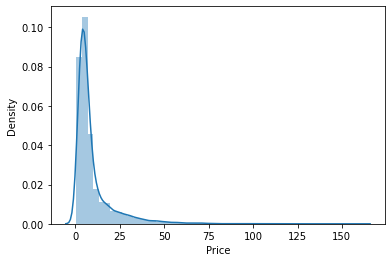

In [408]:
sns.distplot(df_04['Price'])
plt.show()

### 2.Mileage_kmpl

In [409]:
#skewness and kurtosis
print("Skewness: %f" % df_05['Mileage_kmpl'].skew())
print("Kurtosis: %f" % df_05['Mileage_kmpl'].kurt())


Skewness: 0.216013
Kurtosis: -0.275396


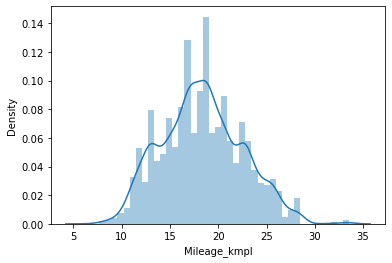

In [410]:
sns.distplot(df_04['Mileage_kmpl'])
plt.show()

### 3. Engine_CC

In [411]:
#skewness and kurtosis
print("Skewness: %f" % df_05['Engine_CC'].skew())
print("Kurtosis: %f" % df_05['Engine_CC'].kurt())

Skewness: 1.423556
Kurtosis: 3.074406


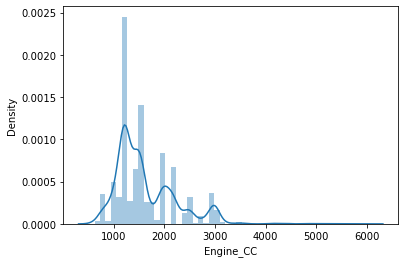

In [412]:
sns.distplot(df_04['Engine_CC'])
plt.show()

### 4.Power_bhp

In [413]:
#skewness and kurtosis
print("Skewness: %f" % df_05['Power_bhp'].skew())
print("Kurtosis: %f" % df_05['Power_bhp'].kurt())

Skewness: 1.917433
Kurtosis: 6.453153


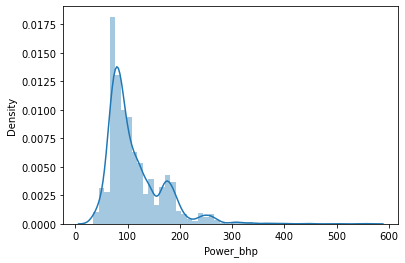

In [414]:
sns.distplot(df_04['Power_bhp'])
plt.show()

### 3. Kilometers_Driven

In [415]:
#skewness and kurtosis
print("Skewness: %f" % df_05['Kilometers_Driven'].skew())
print("Kurtosis: %f" % df_05['Kilometers_Driven'].kurt())

Skewness: 58.715298
Kurtosis: 4123.761866


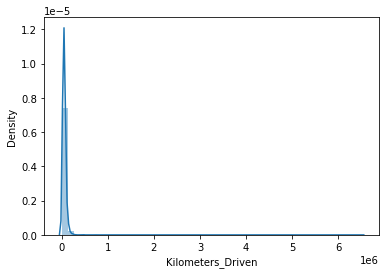

In [416]:
sns.distplot(df_04['Kilometers_Driven'])
plt.show()

In [422]:
df_04.head()

,Car_Company,Car_Model,Engine_CC,Power_bhp,Mileage_kmpl,Kilometers_Driven,Fuel_Type,Transmission,Seats,Owner_Type,Year,Location,CC_Tag,Price
0,maruti,wagon-R,998.0,58.16,26.60,72000,cng,manual,5.0,first,2010,mumbai,NaN,1.75
1,hyundai,creta,1582.0,126.20,19.67,41000,diesel,manual,5.0,first,2015,pune,1.6,12.50
2,honda,jazz,1199.0,88.70,18.20,46000,petrol,manual,5.0,first,2011,chennai,NaN,4.50
3,maruti,ertiga,1248.0,88.76,20.77,87000,diesel,manual,7.0,first,2012,chennai,NaN,6.00
4,audi,a4,1968.0,140.80,15.20,40670,diesel,automatic,5.0,second,2013,coimbatore,2.0,17.74


In [423]:
#use  RobustScaler since outliers are present

In [424]:
#final dataset
df_05 = df_04.drop(['CC_Tag','Seats'],axis= 1)
df_05.shape

(6017, 12)

In [425]:
df_05.head()

,Car_Company,Car_Model,Engine_CC,Power_bhp,Mileage_kmpl,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Year,Location,Price
0,maruti,wagon-R,998.0,58.16,26.60,72000,cng,manual,first,2010,mumbai,1.75
1,hyundai,creta,1582.0,126.20,19.67,41000,diesel,manual,first,2015,pune,12.50
2,honda,jazz,1199.0,88.70,18.20,46000,petrol,manual,first,2011,chennai,4.50
3,maruti,ertiga,1248.0,88.76,20.77,87000,diesel,manual,first,2012,chennai,6.00
4,audi,a4,1968.0,140.80,15.20,40670,diesel,automatic,second,2013,coimbatore,17.74


In [426]:
X = df_05.drop(['Price'],axis=1)
y = df_05['Price']

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=40)

In [428]:
num_cols     = [col for col in X_train.columns if X_train[col].dtypes!='O']
cat_cols_ohe = [col for col in X_train.columns if X_train[col].dtypes=='O']

In [430]:
#stat    = ['first','second','third','fourth & above']

In [431]:
pp_num = Pipeline([
    ('rob_num',RobustScaler())
])

pp_ohe = Pipeline([
    ('pp_ohe',OneHotEncoder(sparse=False, handle_unknown='ignore'))
])


In [433]:
ct = ColumnTransformer([
    
    ('pp_num',pp_num,num_cols),
    ('pp_cat_ohe',pp_ohe,cat_cols_ohe)
    
    ],remainder='passthrough')

In [434]:
ct.fit_transform(X_train)

array([[-0.37279597, -0.23088924,  0.38037866, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00503778,  0.37909516, -0.1979346 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.63224181,  1.40873635,  0.24784854, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.86397985,  0.72230889, -0.37005164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00629723,  0.07644306,  1.19621343, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.59823678,  1.25787832, -0.08089501, ...,  0.        ,
         1.        ,  0.        ]])

In [435]:
ct.transform(X_test)

array([[ 0.11712846,  0.17129485, -0.43889845, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12216625, -0.63806552, -0.0464716 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8186398 ,  1.19032761, -0.5697074 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.12342569,  0.43057722, -0.1979346 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26070529,  0.12948518, -0.92082616, ...,  0.        ,
         0.        ,  0.        ],
       [-0.37279597, -0.1825273 ,  0.12908778, ...,  1.        ,
         0.        ,  0.        ]])

In [436]:
#model pipeline

In [437]:
xgb_reg = XGBRegressor(n_estimators=9750,learning_rate=5e-2, n_jobs=-1)

In [438]:
pipe_final = Pipeline([
    
    ('ct_step' ,ct),
    ('model',xgb_reg)
])

In [439]:
pipe_final.fit(X_train,y_train)

Pipeline(steps=[('ct_step',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pp_num',
                                                  Pipeline(steps=[('rob_num',
                                                                   RobustScaler())]),
                                                  ['Engine_CC', 'Power_bhp',
                                                   'Mileage_kmpl',
                                                   'Kilometers_Driven',
                                                   'Year']),
                                                 ('pp_cat_ohe',
                                                  Pipeline(steps=[('pp_ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Car_Company',

In [441]:
preds = pipe_final.predict(X_test)

In [442]:
score = mean_absolute_error(y_test, preds)
print('MAE:', score)

MAE: 1.1894091404474456


In [443]:
pipe_final.fit(X_train, y_train)
pipe_final.score(X_test,y_test)*100

94.38084918716484

In [444]:
#cross val

In [445]:
scores = cross_val_score(pipe_final, X, y,scoring="neg_mean_absolute_error", cv=10)
abs(scores).mean()

1.1918785101513947

In [446]:
y_pred = pipe_final.predict(X_test)
score = r2_score(y_pred,y_test)
score

0.943422412079828

In [447]:
pipe_final.get_params()

{'memory': None,
 'steps': [('ct_step',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pp_num',
                                    Pipeline(steps=[('rob_num', RobustScaler())]),
                                    ['Engine_CC', 'Power_bhp', 'Mileage_kmpl',
                                     'Kilometers_Driven', 'Year']),
                                   ('pp_cat_ohe',
                                    Pipeline(steps=[('pp_ohe',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['Car_Company', 'Car_Model', 'Fuel_Type',
                                     'Transmission', 'Owner_Type', 'Location'])])),
  ('model',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_

#  Testing

In [448]:
X_train.head()

,Car_Company,Car_Model,Engine_CC,Power_bhp,Mileage_kmpl,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Year,Location
5793,hyundai,i10,1197.0,78.9,20.36,84912,petrol,manual,first,2011,hyderabad
3962,honda,city,1497.0,118.0,17.00,45501,petrol,manual,first,2011,kolkata
4416,bmw,3-Series,1995.0,184.0,19.59,36255,diesel,automatic,first,2015,hyderabad
3661,mercedes-benz,e-class,2143.0,201.1,13.00,39753,diesel,automatic,first,2016,coimbatore
144,toyota,fortuner,2982.0,171.0,11.50,91235,diesel,manual,first,2012,coimbatore


In [449]:
def predict_price(company,model,cc,bph,mileage,km,fuel,trans,owner,year,location):
    
    input_df = pd.DataFrame({    
        
        'Car_Company' : company,
        'Car_Model'   : model,
        'Engine_CC'   : cc,
        'Power_bhp'   : bph,
        'Mileage_kmpl': mileage,
        'Kilometers_Driven' :km,
        'Fuel_Type'   : fuel,
        'Transmission': trans,
        'Owner_Type'  : owner,
        'Year'        : year,
        'Location'    : location
    
    
        },index=[0])

    return pipe_final.predict(input_df)

In [450]:
predict_price('maruti','sx4',1586.0,104.68,15.6,77325.0,'petrol','manual','first',2008,'bangalore')

array([3.1178186], dtype=float32)

In [1078]:
#def input_df (company,model,cc,bph,mileage,km,fuel,trans,owner,age,location):
#
#   df= pd.DataFrame({    
#      
#       'Car_Company' : company,
#       'Car_Model'   : model,
#       'Engine_CC'   : cc,
#       'Power_bhp'   : bph,
#       'Mileage_kmpl': mileage,
#       'Kilometers_Driven' :km,
#       'Fuel_Type'   : fuel ,
#       'Transmission': trans,
#       'Owner_Type'  : owner,
#       'Age'         : age,
#       'Location'    : location
#   },index=[0])
#       
#  return df

In [1079]:
#input_df('maruti','sx4',1586.0,104.68,15.6,77325,'petrol','manual','first',12,'bangalore')

In [451]:
with open ('final_xgbmodel_rev01.pickle','wb') as f:
    pickle.dump(pipe_final,f)

In [452]:
xgbmodel_final = pickle.load(open("final_xgbmodel_rev01.pickle",'rb'))
xgbmodel_final

Pipeline(steps=[('ct_step',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pp_num',
                                                  Pipeline(steps=[('rob_num',
                                                                   RobustScaler())]),
                                                  ['Engine_CC', 'Power_bhp',
                                                   'Mileage_kmpl',
                                                   'Kilometers_Driven',
                                                   'Year']),
                                                 ('pp_cat_ohe',
                                                  Pipeline(steps=[('pp_ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Car_Company',

In [453]:
#jsn = get_feature_names(ct)

In [454]:
column_lst      = [i for i in X_train.columns]
Car_Company_lst = [i for i in X_train.Car_Company.unique()]
Car_Model_lst   = [i for i in X_train.Car_Model.unique()]
Fuel_Type_lst   = [i for i in X_train.Fuel_Type.unique()]
Transmission_lst= [i for i in X_train.Transmission.unique()]
Owner_Type_lst  = [i for i in X_train.Owner_Type.unique()]
Location_lst    = [i for i in X_train.Location.unique()]

In [466]:
Data01_json = {
    
    "columns" :column_lst,
    "company" :Car_Company_lst,
    "model"   :Car_Model_lst,
    "Transmission" : Transmission_lst,
    "location":Location_lst,
    "fuel"    :Fuel_Type_lst,
    "owner"   :Owner_Type_lst,
    
}

In [467]:
with open("data01.json",'w')as f:
    f.write(json.dumps(Data_json))

In [468]:
Data01_json

{'columns': ['Car_Company',
  'Car_Model',
  'Engine_CC',
  'Power_bhp',
  'Mileage_kmpl',
  'Kilometers_Driven',
  'Fuel_Type',
  'Transmission',
  'Owner_Type',
  'Year',
  'Location'],
 'company': ['hyundai',
  'honda',
  'bmw',
  'mercedes-benz',
  'toyota',
  'mahindra',
  'maruti',
  'skoda',
  'fiat',
  'ford',
  'volkswagen',
  'tata',
  'bentley',
  'renault',
  'nissan',
  'volvo',
  'audi',
  'chevrolet',
  'porsche',
  'land-rover',
  'jaguar',
  'mini-cooper',
  'mitsubishi',
  'jeep',
  'datsun',
  'lamborghini',
  'isuzu',
  'force'],
 'model': ['i10',
  'city',
  '3-Series',
  'e-class',
  'fortuner',
  'grand',
  'corolla',
  'scorpio',
  'ciaz',
  'swift',
  'i20',
  'ertiga',
  'fabia',
  'linea',
  'wagon-R',
  'eeco',
  'figo',
  'new',
  'ameo',
  'xuv500',
  'creta',
  'innova',
  'ecosport',
  'indigo',
  'continental',
  'baleno',
  'safari',
  'xenon',
  'ssangyong',
  'verna',
  'octavia',
  'rapid',
  'duster',
  'vitara',
  'm-class',
  'celerio',
  'accord